#Imports and helper functions

In [0]:
PATH_RESULTS = "./trained_nets/results/"


In [0]:
def highlight_main(s, exp):
  if s['Experiment'] == exp:
      return ['background-color: yellow']*len(s)
  else:
      return ['']*len(s)

In [0]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: lightgreen' if v else '' for v in is_max]

In [0]:
def highlight_min(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_min = s == s.min()
    return ['background-color: lightgreen' if v else '' for v in is_min]

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
import pandas as pd
pd.options.display.max_columns = 999

In [0]:
import pickle

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [0]:
cols = ['Experiment', 'CLASS', 'Test med error', 'Test accuracy', 'Test correct shapes', 'Test correct classes', 'ALPHA',
       'BETA', 'WEIGHT_DELTA_LOSS', 'WEIGHT_EMBEDDING_LOSS', 'WEIGHT_SHAPE_LOSS', 'WEIGHT_SHAPE_LOSS_VOXNET', 'VOXNET_LOADED_FROM',
       'Stage 1 med error', 'Stage 1 accuracy', 'Stage 1 correct shapes', 'Stage 1 correct classes', 'Stage 2 val med error',
       'Stage 2 val accuracy', 'Stage 2 correct shapes', 'Stage 2 correct classes', 'EMBEDDING_SIZE', 'SHAPE_EMBEDDING_SIZE', 'BATCH_SIZE_VOXNET',
       'BATCH_SIZE_RESNET', 'NUM_EPOCHS_VOXNET', 'NUM_EPOCHS_RESNET',
       'DISENTANGLED', 'LR_VOXNET']

# Overview over results

In [19]:
df_sorted_lr = load_obj(PATH_RESULTS + 'final_experiments')[[cols[0]] + cols[2:]].rename(columns={'WEIGHT_DELTA_LOSS':'WEIGHT DELTA LOSS', 'WEIGHT_EMBEDDING_LOSS': 'WEIGHT EMBEDDING LOSS', 'WEIGHT_SHAPE_LOSS': 'WEIGHT SHAPE LOSS',
                                                                     'WEIGHT_SHAPE_LOSS_VOXNET':'WEIGHT SHAPE LOSS VOXNET',
                     'EMBEDDING_SIZE': 'EMBEDDING SIZE', 'BATCH_SIZE_VOXNET': 'BATCH SIZE VOXNET',
       'BATCH_SIZE_RESNET': 'BATCH SIZE RESNET', 'NUM_EPOCHS_VOXNET': 'NUM EPOCHS VOXNET', 'NUM_EPOCHS_RESNET':'NUM EPOCHS RESNET', 'SHAPE_EMBEDDING_SIZE':'SHAPE EMBEDDING SIZE', 'VOXNET_LOADED_FROM':'VOXNET LOADED FROM'})
(df_sorted_lr.reset_index(drop=True).style
 .apply(highlight_main, axis=1, exp='experiments_embedding_disentangled3')
.apply(highlight_min, subset=['Test med error', 'Stage 1 med error', 'Stage 2 val med error'])
.apply(highlight_max, subset=['Test accuracy', 'Test correct shapes', 'Test correct classes', 'Stage 1 accuracy', 'Stage 1 correct shapes', 'Stage 1 correct classes', 
                              'Stage 2 val accuracy', 'Stage 2 correct shapes', 'Stage 2 correct classes']))

,Experiment,Test med error,Test accuracy,Test correct shapes,Test correct classes,ALPHA,BETA,WEIGHT DELTA LOSS,WEIGHT EMBEDDING LOSS,WEIGHT SHAPE LOSS,WEIGHT SHAPE LOSS VOXNET,VOXNET LOADED FROM,Stage 1 med error,Stage 1 accuracy,Stage 1 correct shapes,Stage 1 correct classes,Stage 2 val med error,Stage 2 val accuracy,Stage 2 correct shapes,Stage 2 correct classes,EMBEDDING SIZE,SHAPE EMBEDDING SIZE,BATCH SIZE VOXNET,BATCH SIZE RESNET,NUM EPOCHS VOXNET,NUM EPOCHS RESNET,DISENTANGLED,LR_VOXNET
0,experiments_embedding_disentangled,0.112328,0.888760,0.658080,0.919155,0.500000,0.700000,0.600000,0.400000,0.010000,0.010000,nan,0.061669,0.775391,1.000000,1.000000,0.117158,0.900000,0.650000,0.929167,512,8,512,20,3000,50,True,0.001000
1,experiments_embedding_not_disentangled,0.113022,0.884571,0.703271,0.959622,0.500000,0.700000,0.600000,0.400000,0.010000,0.010000,nan,0.064435,0.726562,0.998047,1.000000,0.126969,0.879167,0.679167,0.954167,512,8,512,20,3000,50,False,0.001000
2,experiments_wo_embedding,0.139005,0.805152,0.487655,0.905072,0.500000,0.700000,0.600000,0.400000,0.010000,0.010000,nan,nan,nan,nan,nan,0.138702,0.829167,0.466667,0.854167,512,8,512,20,0,50,False,0.001000
3,experiments_embedding_size_bigger,0.118502,0.885640,0.711026,0.961850,0.500000,0.700000,0.600000,0.400000,0.010000,0.010000,nan,0.064192,0.718750,1.000000,1.000000,0.122868,0.887500,0.695833,0.941667,700,8,512,20,3000,50,False,0.001000
4,experiments_embedding_size_smaller,0.113655,0.870042,0.674659,0.939478,0.500000,0.700000,0.600000,0.400000,0.010000,0.010000,nan,0.068556,0.699219,1.000000,1.000000,0.126737,0.875000,0.654167,0.925000,300,8,512,20,3000,50,False,0.001000
5,experiments_embedding_disentangled2,0.113519,0.889295,0.675461,0.926642,0.500000,0.700000,0.600000,0.400000,0.010000,0.010000,nan,0.064220,0.744141,1.000000,1.000000,0.130898,0.895833,0.666667,0.879167,512,12,512,20,3000,50,True,0.001000
6,experiments_embedding_disentangled3,0.113194,0.889830,0.677779,0.901685,0.500000,0.700000,0.600000,0.400000,0.010000,0.010000,nan,0.063050,0.740234,1.000000,1.000000,0.120545,0.883333,0.658333,0.887500,1024,512,512,20,3000,50,True,0.001000
7,experiments_wo_embedding2,0.117991,0.870398,0.710848,0.980925,0.500000,0.700000,0.600000,0.400000,0.010000,0.010000,nan,nan,nan,nan,nan,0.131315,0.895833,0.691667,0.975000,1024,512,512,20,0,50,True,0.001000
8,experiments_beta_smaller,0.164081,0.698815,0.674570,0.908370,0.500000,0.520000,0.600000,0.400000,0.010000,0.010000,nan,1.532780,0.416016,1.000000,1.000000,0.170856,0.704167,0.633333,0.904167,1024,512,512,20,3000,50,True,0.001000
9,experiments_beta_bigger,0.120030,0.885462,0.653089,0.874944,0.500000,1.000000,0.600000,0.400000,0.010000,0.010000,nan,0.084560,0.818359,1.000000,1.000000,0.122057,0.908333,0.658333,0.887500,1024,512,512,20,3000,50,True,0.001000


# Display learning Curves

## Stage 1

In [0]:
EXPERIMENTS = ['experiments_embedding_disentangled3']

med_errors_val = []
losses_val = []

for exp in EXPERIMENTS:
  med_errors_val.append(np.load(PATH_RESULTS + exp + '_voxNet_med_error.npy', allow_pickle=True))
  losses_val.append(np.load(PATH_RESULTS + exp + '_voxNet_loss.npy', allow_pickle=True))
  


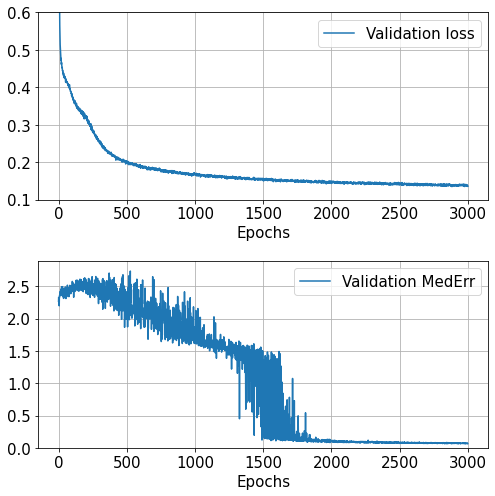

In [0]:
fig, ax = plt.subplots(2,1, figsize=(7,7))


for i in range(len(med_errors_val)):
  ax[0].plot(losses_val[i][::1], label='Validation loss')
  ax[1].plot(med_errors_val[i][::1], label='Validation MedErr')


ax[0].set_ylim((0.1,0.6))
ax[0].set_yticklabels(np.arange(1,7) / 10, fontsize=15)
ax[0].set_xlabel('Epochs', fontsize=15)
ax[0].set_xticks(np.arange(7)*500)
ax[0].set_xticklabels(np.arange(7)*500, fontsize=15)
ax[0].grid()


ax[1].set_ylim((0,2.9))
ax[1].set_yticklabels(np.arange(6) * 0.5, fontsize=15)
ax[1].set_xlabel('Epochs', fontsize=15)
ax[1].set_xticks(np.arange(7)*500)
ax[1].set_xticklabels(np.arange(7)*500, fontsize=15)
ax[1].grid()


ax[0].legend(fontsize=15)
ax[1].legend(fontsize=15)

plt.tight_layout(h_pad=2.)

plt.show()

## Stage 2

In [0]:
EXPERIMENTS = ['experiments_embedding_disentangled3']

med_errors_val = []
losses_val = []
losses_train = []

for exp in EXPERIMENTS:
  med_errors_val.append(np.load(PATH_RESULTS + exp + '_resNet_med_error_val.npy', allow_pickle=True))
  losses_val.append(np.load(PATH_RESULTS + exp + '_resNet_loss_val.npy', allow_pickle=True))
  losses_train.append(np.load(PATH_RESULTS + exp + '_resNet_losses_train.npy', allow_pickle=True))
  


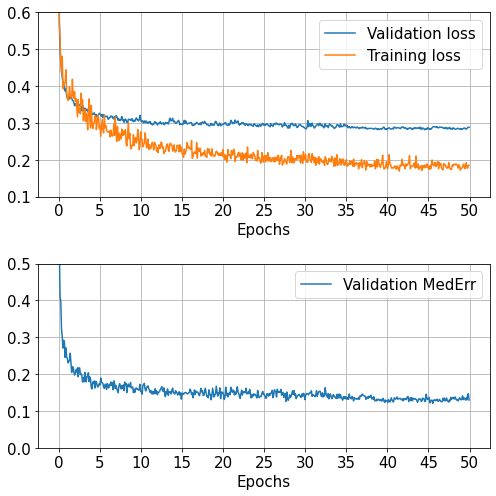

In [0]:
fig, ax = plt.subplots(2,1, figsize=(7,7))


for i in range(len(med_errors_val)):
  ax[0].plot(np.arange(566) * 1021,losses_val[i][::1], label='Validation loss')
  ax[1].plot(np.arange(566) * 1021, med_errors_val[i][::1], label='Validation MedErr')
  ax[0].plot(np.arange(566) * 1021, losses_train[i][::50], label='Training loss')


ax[0].set_ylim((0.1,0.6))
ax[0].set_yticklabels(np.arange(1,7) / 10, fontsize=15)
ax[0].set_xlabel('Epochs', fontsize=15)
ax[0].set_xticks(np.arange(11) * 11551 * 5)
ax[0].set_xticklabels(np.arange(11) * 5, fontsize=15)
ax[0].grid()


ax[1].set_ylim((0,0.5))
ax[1].set_yticklabels(np.arange(6) / 10, fontsize=15)
ax[1].set_xlabel('Epochs', fontsize=15)
ax[1].set_xticks(np.arange(11) * 11551 * 5)
ax[1].set_xticklabels(np.arange(11) * 5, fontsize=15)
ax[1].grid()

ax[0].legend(fontsize=15)
ax[1].legend(fontsize=15)

plt.tight_layout(h_pad=2.)

plt.show()

# Individual results

In [0]:
df_individual = load_obj(PATH_RESULTS + 'final_experiments_individual')

In [0]:
df = df_individual.copy()

In [0]:
# converting med errors to degrees:
for col in df.columns.values:
  if 'med error' in col:
    for row in df.index.values:
      df.at[row, col] = df[col][row] / (2*np.pi) * 360

In [0]:
classes = ['aeroplane', 'bicycle', 'boat', 'bottle', 'bus', 'car', 'chair', 'diningtable', 'motorbike', 'sofa', 'train', 'tvmonitor']


paper_med_errors = [10.0, 13.8, 21.1, 7.5, 2.8, 4.8, 11.4, 10.5, 12.9, 9.9, 5.4, 13.2]
paper_accuracy = [0.82, 0.84, 0.58, 0.93, 0.97, 0.91, 0.79, 0.76, 0.86, 0.90, 0.83, 0.83]
paper_correct_shapes = [0.64, 0.55, 0.77, 0.57, 0.75, 0.51, 0.39, 0.67, 0.63, 0.38, 0.53, 0.72]

df_paper = pd.DataFrame({'Experiment':['paper']}, index=[0])

for i, cls in enumerate(classes):
  df_paper = df_paper.assign(**{(cls+' med error'): paper_med_errors[i], 
                                       cls+' accuracy':paper_accuracy[i],
                                       cls+' correct shape': paper_correct_shapes[i]})
  
df = df.append(df_paper, ignore_index=True)


In [24]:
# only med errors
classes = ['aeroplane', 'bicycle', 'boat', 'bottle', 'bus', 'car', 'chair', 'diningtable', 'motorbike', 'sofa', 'train', 'tvmonitor']
df_med_errors = df[['Experiment'] + [cls + ' med error' for cls in classes]].copy()
df_med_errors.columns = (['Experiment', 'aeroplane', 'bicycle', 'boat', 'bottle', 'bus', 'car', 'chair', 'diningtable', 'motorbike', 'sofa', 'train', 'tvmonitor'])

df_med_errors['mean'] = df_med_errors.mean(numeric_only=True, axis=1)

df_med_errors.style.apply(highlight_main, axis=1, exp='experiments_embedding_disentangled3').apply(highlight_min)


,Experiment,aeroplane,bicycle,boat,bottle,bus,car,chair,diningtable,motorbike,sofa,train,tvmonitor,mean
0,experiments_embedding_disentangled,9.636352,11.864516,12.714186,7.437169,2.731225,3.439117,7.137238,6.005769,13.655220,7.452667,4.706444,9.872072,8.054331
1,experiments_embedding_not_disentangled,8.955983,11.883503,13.941225,7.653041,3.019993,3.551816,7.134929,6.070247,14.218115,7.683548,5.112129,10.905659,8.344182
2,experiments_wo_embedding,13.661207,17.258081,20.488780,8.853348,3.650232,4.311389,8.369029,7.382620,16.463309,7.849180,5.719162,12.298856,10.525433
3,experiments_embedding_size_bigger,9.997805,13.219929,13.267661,7.809017,2.923556,3.765460,7.424865,6.771409,13.894229,7.519144,5.227497,10.250371,8.505912
4,experiments_embedding_size_smaller,9.780220,12.436141,13.136011,7.450508,3.178538,3.724258,7.424918,6.490691,14.933382,7.281683,4.781187,10.345887,8.413619
5,experiments_embedding_disentangled2,9.496494,12.079595,12.756510,7.367561,2.721892,3.594121,7.691717,5.677131,13.822625,7.376770,4.749699,10.154547,8.124055
6,experiments_embedding_disentangled3,9.368211,12.321153,12.483248,7.092239,2.727639,3.488183,7.486660,6.217350,13.097697,7.485297,4.963963,9.889068,8.051726
7,experiments_wo_embedding2,10.391540,12.908398,14.058618,7.720649,2.914972,3.426570,7.656373,6.806539,13.942246,7.547900,4.990808,10.872070,8.603057
8,experiments_beta_smaller,21.037956,23.441375,43.918591,7.910409,3.706233,4.550102,8.629943,7.913486,22.063181,8.282662,6.294945,9.897456,13.970528
9,experiments_beta_bigger,9.755784,12.456962,13.361027,7.447030,3.206501,4.012492,7.719835,7.033357,13.749651,7.692635,5.584267,10.576148,8.549641


In [25]:
# only accuracies
classes = ['aeroplane', 'bicycle', 'boat', 'bottle', 'bus', 'car', 'chair', 'diningtable', 'motorbike', 'sofa', 'train', 'tvmonitor']
df_accuracy = df[['Experiment'] + [cls + ' accuracy' for cls in classes]].copy()
df_accuracy.columns = (['Experiment', 'aeroplane', 'bicycle', 'boat', 'bottle', 'bus', 'car', 'chair', 'diningtable', 'motorbike', 'sofa', 'train', 'tvmonitor'])
df_accuracy['mean'] = df_accuracy.mean(numeric_only=True, axis=1)

df_accuracy.style.apply(highlight_main, axis=1, exp='experiments_embedding_disentangled3').apply(highlight_max)


,Experiment,aeroplane,bicycle,boat,bottle,bus,car,chair,diningtable,motorbike,sofa,train,tvmonitor,mean
0,experiments_embedding_disentangled,0.838280,0.848024,0.729794,0.910644,0.953358,0.957523,0.937743,0.840416,0.848287,0.966054,0.959184,0.873194,0.888542
1,experiments_embedding_not_disentangled,0.835210,0.844985,0.694929,0.915900,0.925373,0.958243,0.939689,0.854293,0.840131,0.966054,0.952904,0.878010,0.883810
2,experiments_wo_embedding,0.668373,0.685410,0.574485,0.880420,0.867537,0.882649,0.859922,0.808326,0.709625,0.944837,0.957614,0.850722,0.807493
3,experiments_embedding_size_bigger,0.830092,0.820669,0.720285,0.910644,0.934701,0.958603,0.928016,0.852559,0.835237,0.967468,0.959184,0.886035,0.883624
4,experiments_embedding_size_smaller,0.804504,0.819149,0.717116,0.909330,0.919776,0.951044,0.922179,0.810061,0.760196,0.963225,0.952904,0.869984,0.866622
5,experiments_embedding_disentangled2,0.833163,0.832827,0.731379,0.918528,0.930970,0.957523,0.931907,0.855160,0.840131,0.967468,0.963893,0.892456,0.887950
6,experiments_embedding_disentangled3,0.851586,0.843465,0.721078,0.918528,0.947761,0.958243,0.924125,0.845620,0.851550,0.967468,0.954474,0.887640,0.889295
7,experiments_wo_embedding2,0.792221,0.805471,0.707607,0.885677,0.938433,0.947804,0.892996,0.843886,0.809135,0.944837,0.960754,0.882825,0.867637
8,experiments_beta_smaller,0.530194,0.530395,0.461173,0.886991,0.777985,0.738301,0.793774,0.702515,0.557912,0.920792,0.806907,0.839486,0.712202
9,experiments_beta_bigger,0.835210,0.851064,0.717116,0.923784,0.947761,0.953564,0.928016,0.837814,0.843393,0.957567,0.956044,0.878010,0.885779


In [26]:
# only correct shape
df1 = df[[cls + ' correct shape' for cls in classes]]
df2 = df[[cls + ' correct class' for cls in classes]]
for col in df2.columns.values:
  df2.at[len(df['Experiment'].tolist()) - 1,col] = 1
df_correct_shape = pd.DataFrame(df1.values * df2.values, columns=df1.columns, index=df1.index)
df_correct_shape.insert(0, "Experiment", df['Experiment'].tolist()) 
df_correct_shape['mean'] = df_correct_shape.mean(numeric_only=True, axis=1)

df_correct_shape.style.apply(highlight_main, axis=1, exp='experiments_embedding_disentangled3').apply(highlight_max)


,Experiment,aeroplane correct shape,bicycle correct shape,boat correct shape,bottle correct shape,bus correct shape,car correct shape,chair correct shape,diningtable correct shape,motorbike correct shape,sofa correct shape,train correct shape,tvmonitor correct shape,mean
0,experiments_embedding_disentangled,0.645328,0.442291,0.706327,0.521518,0.685927,0.588539,0.482028,0.655837,0.538922,0.510154,0.799571,0.603073,0.598293
1,experiments_embedding_not_disentangled,0.742331,0.534622,0.780380,0.605423,0.747348,0.622753,0.548684,0.682202,0.692851,0.657078,0.807080,0.711310,0.677672
2,experiments_wo_embedding,0.470166,0.067932,0.579769,0.282806,0.514191,0.291705,0.186233,0.687030,0.500504,0.660449,0.697177,0.653597,0.465963
3,experiments_embedding_size_bigger,0.734275,0.545911,0.782747,0.639852,0.759071,0.627307,0.531541,0.675097,0.714886,0.663660,0.859642,0.751781,0.690481
4,experiments_embedding_size_smaller,0.626681,0.486091,0.747851,0.610515,0.707326,0.592729,0.470246,0.661265,0.650469,0.594099,0.804665,0.649825,0.633480
5,experiments_embedding_disentangled2,0.589427,0.475259,0.765425,0.609898,0.669860,0.600511,0.452142,0.651416,0.638648,0.565439,0.766717,0.665771,0.620876
6,experiments_embedding_disentangled3,0.647869,0.463105,0.736608,0.496048,0.698586,0.595972,0.524569,0.641128,0.560387,0.532593,0.743004,0.611008,0.604240
7,experiments_wo_embedding2,0.715100,0.454657,0.807639,0.590170,0.789921,0.669153,0.586530,0.734034,0.746709,0.650176,0.843436,0.763924,0.695954
8,experiments_beta_smaller,0.639909,0.408833,0.771649,0.511223,0.706588,0.595012,0.545050,0.608244,0.566295,0.521413,0.773297,0.664882,0.609366
9,experiments_beta_bigger,0.668812,0.498152,0.711961,0.475590,0.587906,0.504882,0.398401,0.631092,0.548031,0.485981,0.701668,0.654450,0.572244


# make command line argument to rerun an experiment:

In [49]:
exp = 'experiments_embedding_disentangled3'
result_file = 'final_experiments'

df = load_obj(PATH_RESULTS + result_file)


parameters = {'-wdl':'WEIGHT_DELTA_LOSS', '-rsl':'WEIGHT_SHAPE_LOSS', '-vsl':'WEIGHT_SHAPE_LOSS_VOXNET',
              '-ner':'NUM_EPOCHS_RESNET', '-nev':'NUM_EPOCHS_VOXNET', '-wel':'WEIGHT_EMBEDDING_LOSS', 
              '-a':'ALPHA', '-b':'BETA', '-lrr':'LR_RESNET', '-lrv':'LR_VOXNET',
              '-vload':'VOXNET_LOADED_FROM', '-rload':'RESNET_LOADED_FROM', '-jf':'JITTER_FACTOR',
              '-de':'DISENTANGLED', '-embsize':'EMBEDDING_SIZE',
              '-lrv_change':'EPOCH_CHANGE_LR_VOXNET', '-lrr_change':'EPOCH_CHANGE_LR_RESNET'}

cmd_line_arg = 'python3 local_implementation_run_all_multi_class.py -n \'' + exp + '\' -n_res \'' + result_file + '\''

for (arg, param) in parameters.items():
  try:
    value = df[df['Experiment'] == exp].loc[0, param]
    if type(value) == np.bool_:
      if value:
        cmd_line_arg += ' ' + arg + ' '
    elif str(value) != 'nan':
      cmd_line_arg += ' ' + arg + ' ' 
      if type(value) == str:
        cmd_line_arg += '\'' + str(value) + '\''
      else:
        cmd_line_arg += str(value)
    else:
      print('value is nan for ' + arg + ' : ' + param)
  except:
    print('no value found for ' + arg + ' : ' + param)


print(cmd_line_arg)

value is nan for -vload : VOXNET_LOADED_FROM
value is nan for -rload : RESNET_LOADED_FROM
python3 local_implementation_run_all_multi_class.py -n 'experiments_embedding_disentangled3' -n_res 'final_experiments' -wdl 0.6 -rsl 0.01 -vsl 0.01 -ner 50 -nev 3000 -wel 0.4 -a 0.5 -b 0.7 -lrr 0.0001 -lrv 0.001 -jf 0.05 -de  -embsize 1024 -lrv_change 3000 -lrr_change 35
